In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
oli=datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Garvit\scikit_learn_data


In [3]:
oli

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [4]:
oli.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [7]:
oli.data.shape

(400, 4096)

In [9]:
oli.images.shape

(400, 64, 64)

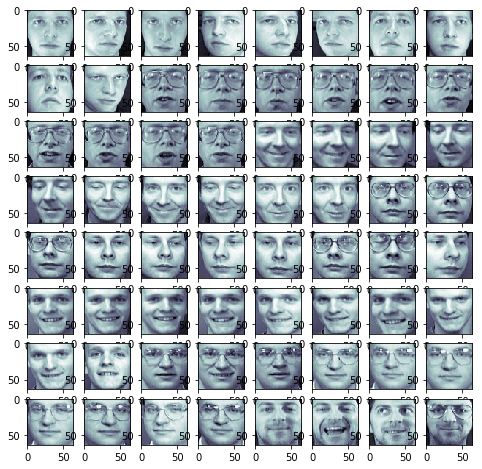

In [13]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(oli.images[i], cmap=plt.cm.bone)

In [22]:
x=oli.data
y=oli.target
pca=PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
pca.components_.shape

(400, 4096)

In [24]:
current=0;
total=pca.explained_variance_.sum()
k=0
while current/total<0.95:
    current+=pca.explained_variance_[k]
    k+=1;
k 

123

In [25]:
pca=PCA(n_components=k)
d=pca.fit_transform(x)
d.shape

(400, 123)

In [26]:
x_approx=pca.inverse_transform(d)
x_approx.shape

(400, 4096)

In [28]:
x=x_approx.reshape((400,64,64))
x.shape

(400, 64, 64)

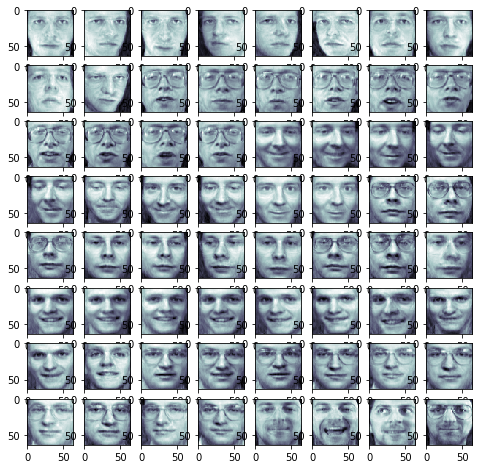

In [29]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x[i], cmap=plt.cm.bone)

In [30]:
eigen=pca.components_

In [31]:
eigenface=eigen.reshape((123,64,64))

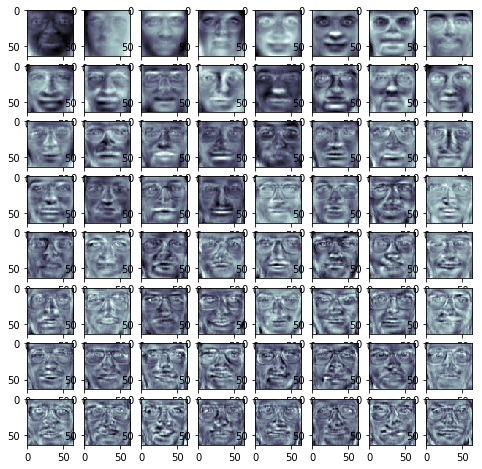

In [32]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(eigenface[i], cmap=plt.cm.bone)